In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [11]:
from pycaret.utils import version
version()

'3.3.1'

In [5]:
import pandas as pd

In [6]:
data=pd.read_csv('/kaggle/input/trip-reviews/tripadvisor_review.csv')
data

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


# 1. Using K-Means Clustering

In [7]:
from pycaret.clustering import *

kMeanClusteringParameters = setup(data, verbose=False)
KMeanClusteringModel = create_model('kmeans', num_clusters=4)
kMeanPrediction = assign_model(KMeanClusteringModel)
kMeanPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0837,127.8697,2.5775,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Cluster
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,Cluster 3
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,Cluster 3
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,Cluster 1
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,Cluster 1
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,Cluster 1
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,Cluster 2
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,Cluster 0
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,Cluster 1


In [9]:
x = save_model(KMeanClusteringModel, 'kMeanClusteringModelFile')

Transformation Pipeline and Model Successfully Saved


In [10]:
import joblib
KMeanClusteringModel1 = joblib.load('kMeanClusteringModelFile.pkl')

In [11]:
evaluate_model(KMeanClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [12]:
plot_model(KMeanClusteringModel, plot='cluster')

In [13]:
plot_model(KMeanClusteringModel, plot = 'tsne')

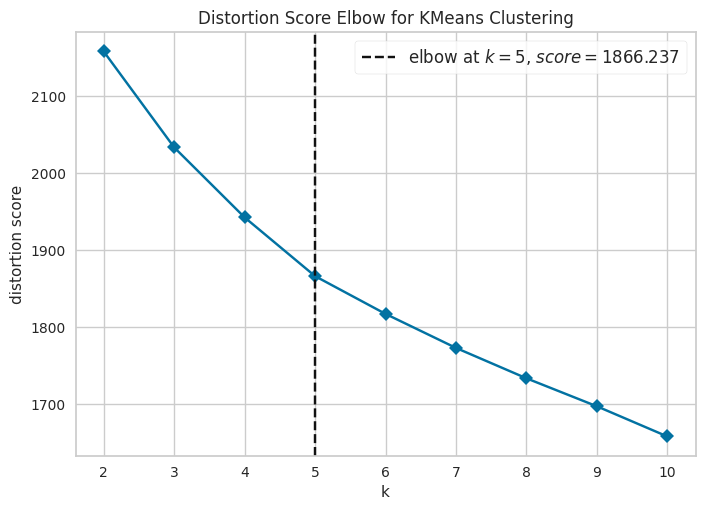

In [14]:
plot_model(KMeanClusteringModel, plot = 'elbow')

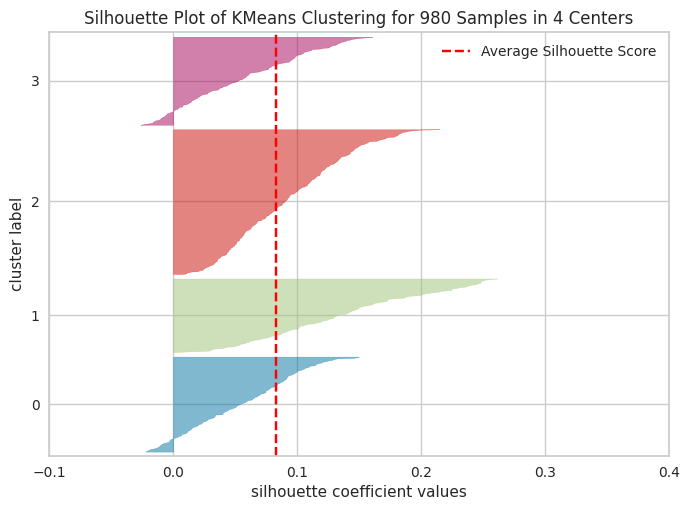

In [15]:
plot_model(KMeanClusteringModel, plot = 'silhouette')

In [13]:
plot_model(KMeanClusteringModel, plot = 'distribution')

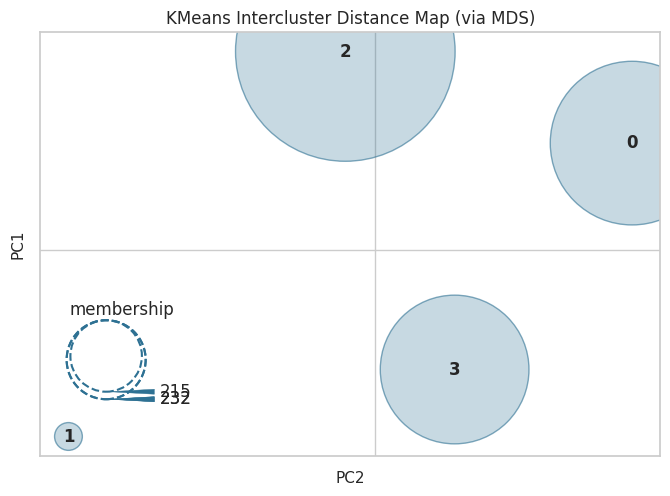

In [17]:
plot_model(KMeanClusteringModel, plot = 'distance')

## No Data Processing

In [18]:
setup(data = data, verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1110,163.7602,2.6469,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0981,128.3526,2.6264,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0834,109.4508,2.5083,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0785,96.4062,2.5827,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0008,1.8589,17.1911,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

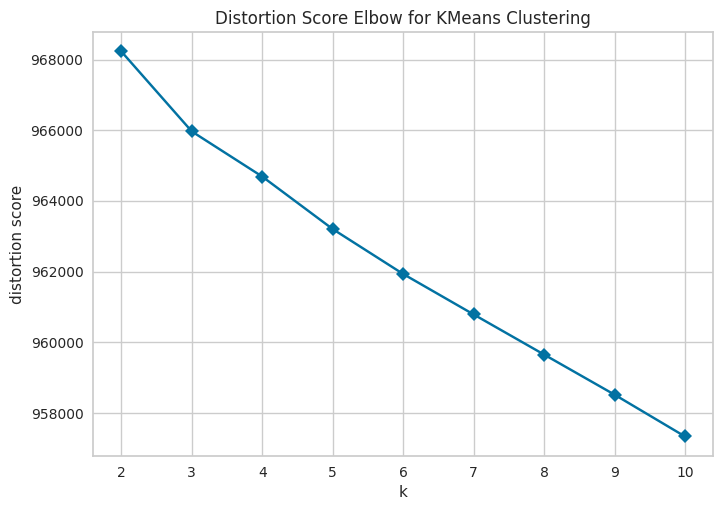

In [19]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans')

plot_model(x, plot = 'elbow')

In [20]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0015,2.0438,16.5016,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0007,1.7574,17.4243,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0004,1.5988,16.5590,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0005,1.6087,14.6655,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [21]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('kmeans', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0005,1.6349,16.0862,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using Transformation

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2498,417.2367,1.2629,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

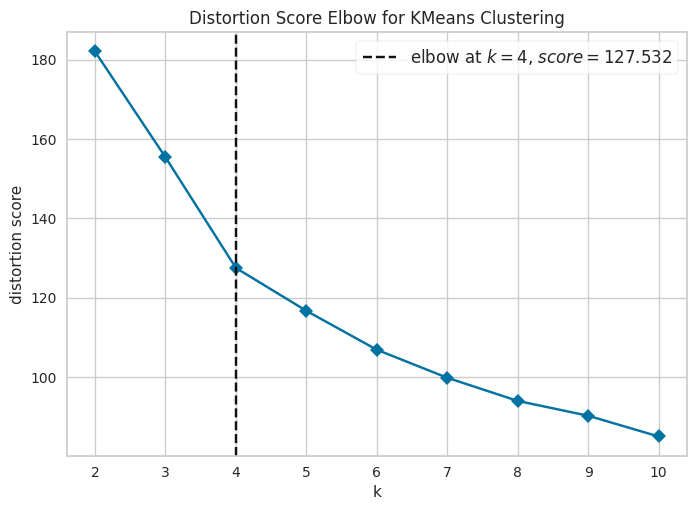

In [22]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [23]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2463,444.5755,1.3701,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1924,343.5239,1.5153,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2141,356.3400,1.3748,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2023,330.0701,1.4252,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0860,127.9305,2.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

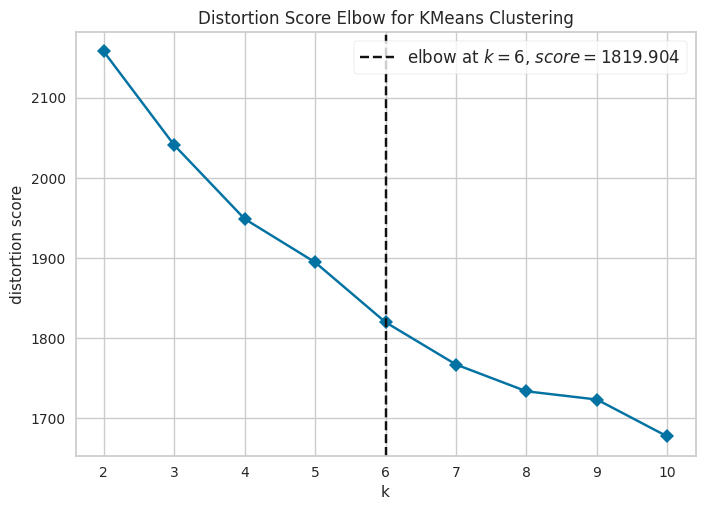

In [24]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [25]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1248,165.0045,2.4267,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0858,127.8420,2.6487,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0806,109.1465,2.6923,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0616,93.3128,2.9085,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using "Transformation" + "Normalization"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0011,1.8872,16.3956,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

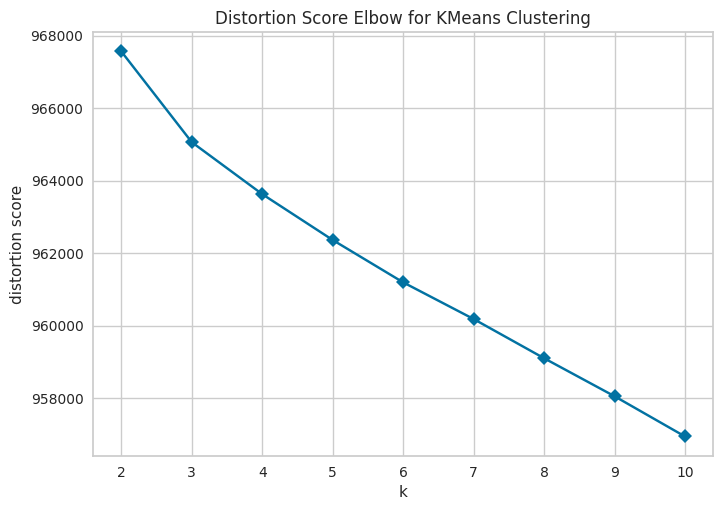

In [26]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [27]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,2.0081,19.3307,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0008,1.8010,17.3490,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0006,1.6844,16.9742,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0006,1.6089,15.9077,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0010,1.7898,14.8926,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

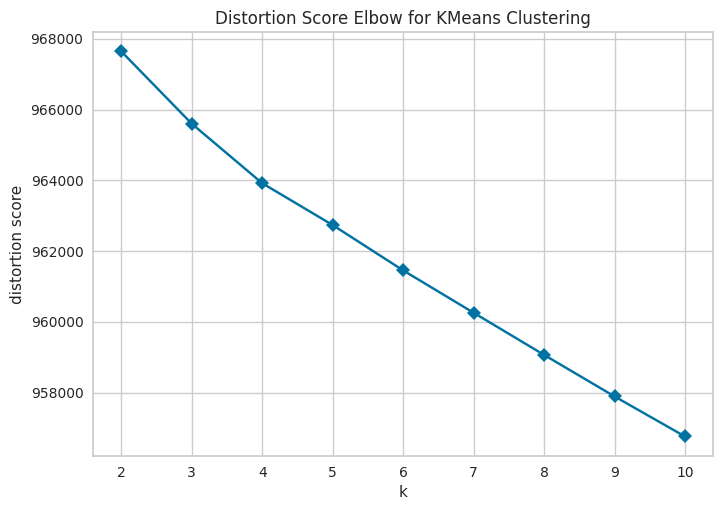

In [28]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('kmeans')
plot_model(x, plot = 'elbow')

In [29]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('kmeans', num_clusters = 3)

print("For Cluster = 4")
x = create_model('kmeans', num_clusters = 4)

print("For Cluster = 5")
x = create_model('kmeans', num_clusters = 5)

print("For Cluster = 6")
x = create_model('kmeans', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,2.0166,19.5812,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0008,1.8108,17.5023,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0007,1.6701,16.1028,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0005,1.5866,15.5035,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# 2. Using Hierarchical Clustering

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0697,113.4169,2.9151,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

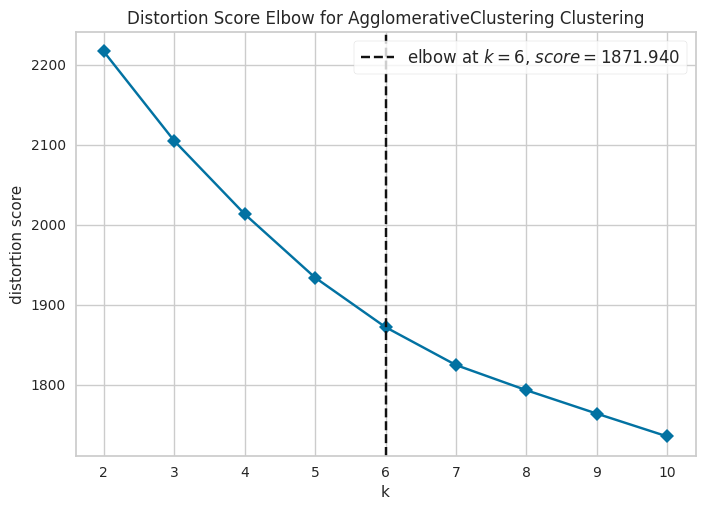

In [30]:
setup(data = data, verbose=False)

x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [31]:
hierarchicalModel = create_model('hclust', num_clusters=6)
hierarchicalModelPrediction = assign_model(hierarchicalModel)
hierarchicalModelPrediction

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:14:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 6 Clusters
Estimator,. . . . . . . . . . . . . . . . . .,Agglomerative Clustering


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
evaluate_model(hierarchicalModel)

In [ ]:
plot_model(hierarchicalModel, plot='cluster')

In [ ]:
plot_model(hierarchicalModel, plot = 'tsne')

In [ ]:
plot_model(hierarchicalModel, plot = 'elbow')

In [ ]:
plot_model(hierarchicalModel, plot = 'distribution')

## No Data Processing

In [ ]:
setup(data = data, verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

## Using Normalization

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

In [ ]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('hclust', num_clusters = 5)
plot_model(x, plot = 'tsne')

## Using Transformation

In [ ]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [ ]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

## Using PCA

In [ ]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [ ]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

## Using "Transformation" + "Normalization"

In [ ]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [ ]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

## Using "Transformation" + "Normalization" + "PCA"

In [ ]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('hclust')
plot_model(x, plot = 'elbow')

In [ ]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('hclust', num_clusters = 3)

print("For Cluster = 4")
x = create_model('hclust', num_clusters = 4)

print("For Cluster = 5")
x = create_model('hclust', num_clusters = 5)

print("For Cluster = 6")
x = create_model('hclust', num_clusters = 6)

# 3. Using Spectral Clustering 

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0697,113.4169,2.9151,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

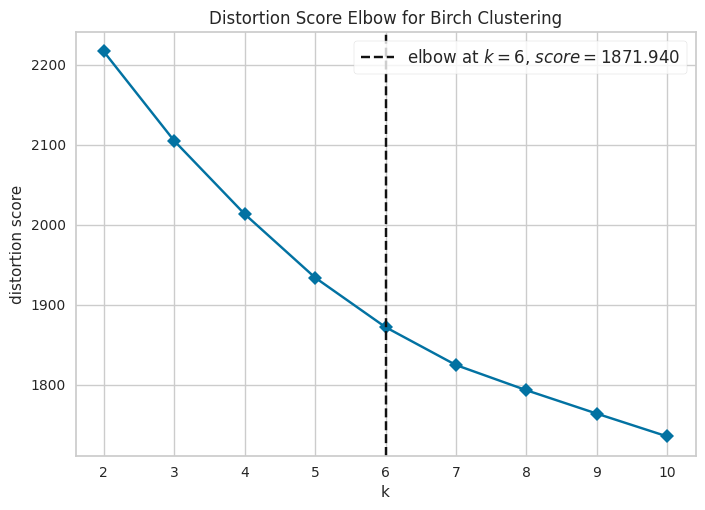

In [23]:
setup(data = data, verbose=False)

x = create_model('birch')
plot_model(x, plot = 'elbow')

In [24]:
SpectralClusteringModel = create_model('birch', num_clusters=4)
SpectralPrediction = assign_model(SpectralClusteringModel)
SpectralPrediction

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0697,113.4169,2.9151,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Cluster
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,Cluster 2
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,Cluster 2
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,Cluster 0
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,Cluster 0
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20,Cluster 0
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80,Cluster 0
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02,Cluster 0
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46,Cluster 0


In [25]:
evaluate_model(SpectralClusteringModel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
plot_model(SpectralClusteringModel, plot='cluster')

In [27]:
plot_model(SpectralClusteringModel, plot = 'tsne')

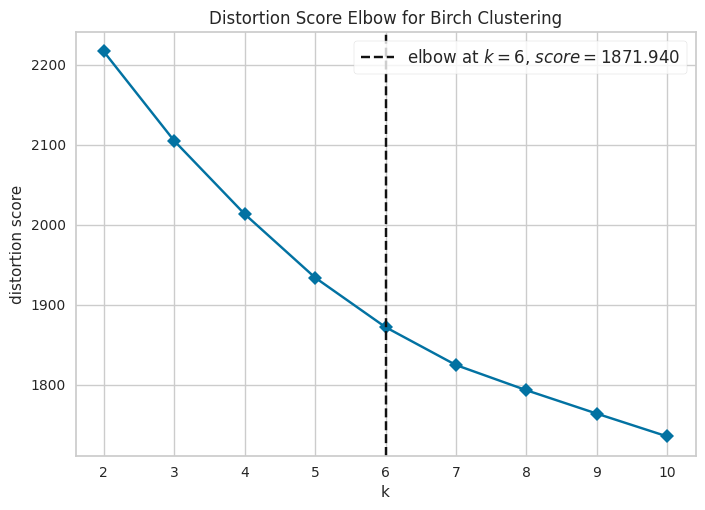

In [28]:
plot_model(SpectralClusteringModel, plot = 'elbow')

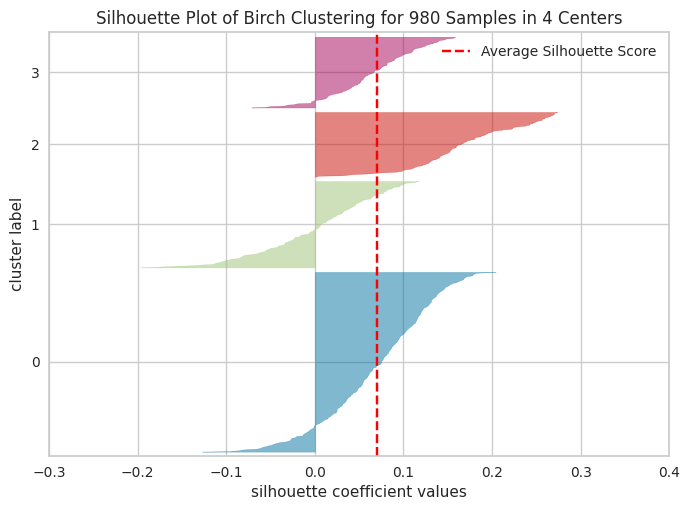

In [29]:
plot_model(SpectralClusteringModel, plot = 'silhouette')

In [30]:
plot_model(SpectralClusteringModel, plot = 'distribution')

## No Data Processing

In [32]:
setup(data = data, verbose=False)

print("For Cluster = 3")
x = create_model('sc', num_clusters = 3)

print("For Cluster = 4")
x = create_model('sc', num_clusters = 4)

print("For Cluster = 5")
x = create_model('sc', num_clusters = 5)

print("For Cluster = 6")
x = create_model('sc', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3180,4.0004,0.5089,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2539,3.5321,0.5514,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2213,6.3652,0.9576,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1864,5.9681,0.9687,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using Normalization

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.9435,16.7015,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

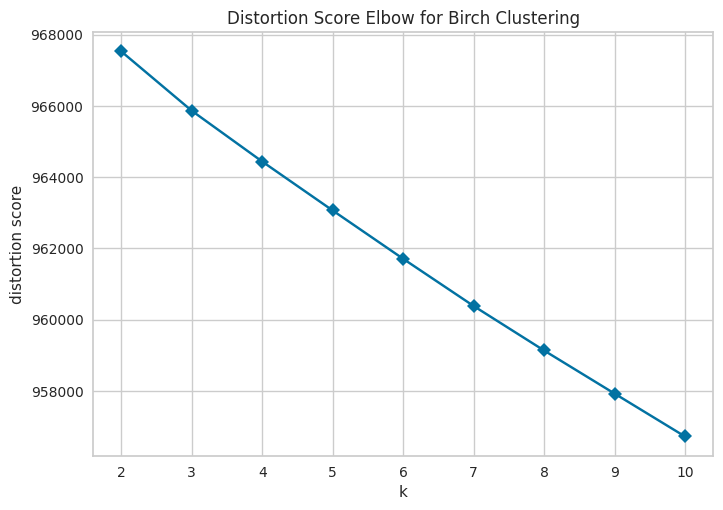

In [34]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('birch')
plot_model(x, plot = 'elbow')

In [35]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)

print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)


For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0020,2.1931,14.3736,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.9435,16.7015,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0008,1.8057,16.0352,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0007,1.7197,15.0932,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [36]:
setup(data = data, normalize = True, normalize_method = 'zscore', verbose=False)
x = create_model('birch', num_clusters = 5)
plot_model(x, plot = 'tsne')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0008,1.8057,16.0352,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using Transformation 

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3172,582.4120,1.2054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

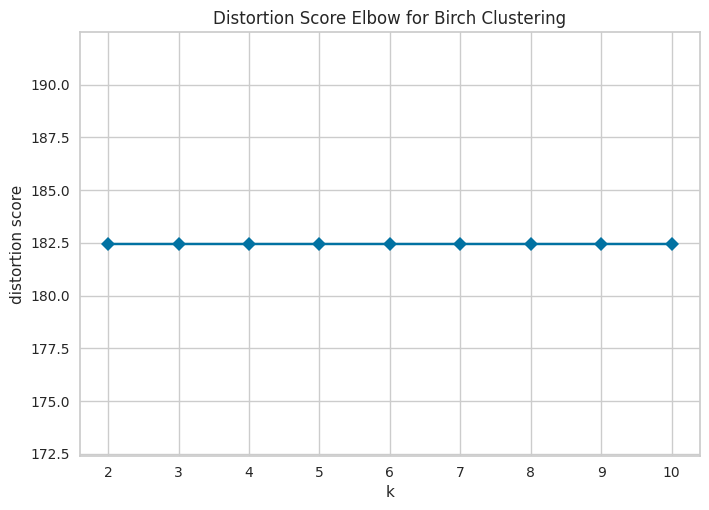

In [38]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)
x = create_model('birch')
plot_model(x, plot = 'elbow')

In [39]:
setup(data = data, transformation = True, transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3172,582.4120,1.2054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3172,582.4120,1.2054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3172,582.4120,1.2054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3172,582.4120,1.2054,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using PCA

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0697,113.4169,2.9151,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

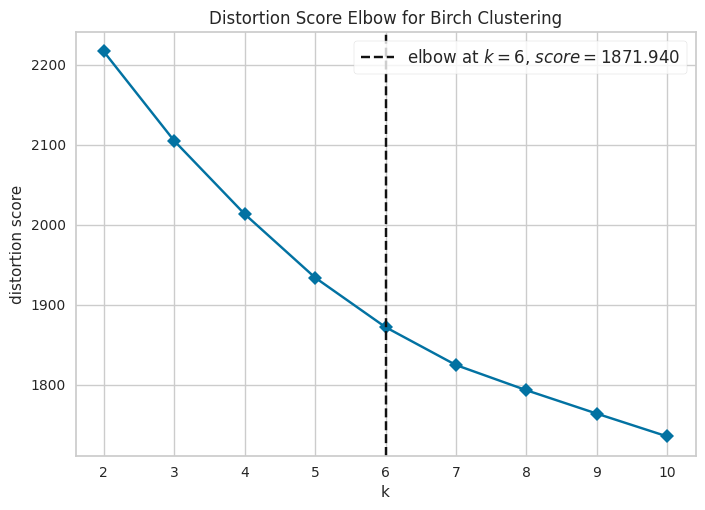

In [40]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)
x = create_model('birch')
plot_model(x, plot = 'elbow')

In [41]:
setup(data = data, pca = True, pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1298,141.6293,2.5243,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0697,113.4169,2.9151,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0607,98.4764,2.8817,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0629,87.7509,2.8065,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using "Transformation" + "Normalization"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.7754,16.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

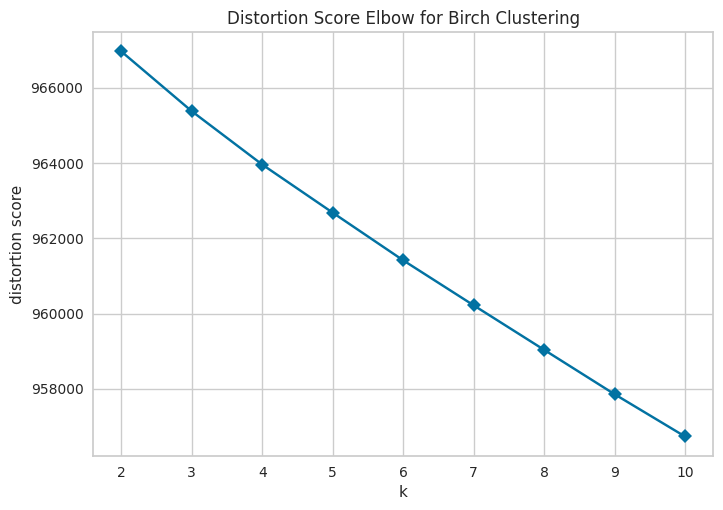

In [42]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)
x = create_model('birch')
plot_model(x, plot = 'elbow')

In [43]:
setup(data = data, transformation = True, normalize = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson', verbose=False)

print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.9448,19.7566,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.7754,16.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0007,1.6557,16.4025,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0004,1.5815,15.5356,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

## Using "Transformation" + "Normalization" + "PCA"

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.7754,16.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

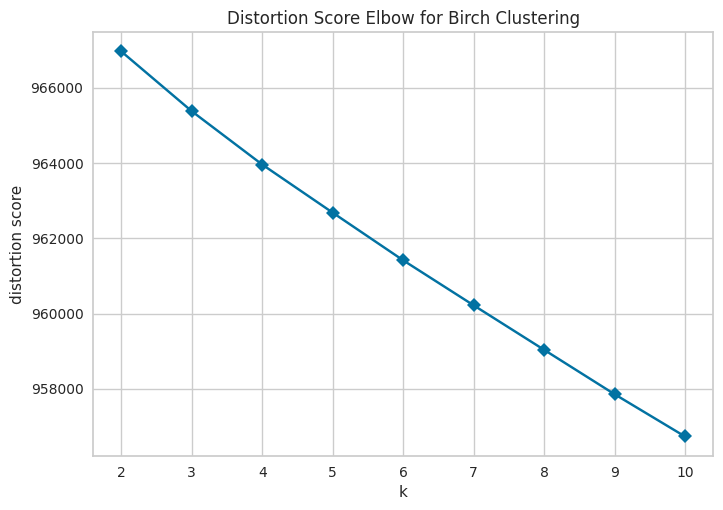

In [44]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore', transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)
x = create_model('birch')
plot_model(x, plot = 'elbow')

In [45]:
setup(data = data, transformation = True, normalize = True, pca = True,
      normalize_method = 'zscore',
      transformation_method = 'yeo-johnson',
      pca_method = 'linear', verbose=False)

print("For Cluster = 3")
x = create_model('birch', num_clusters = 3)

print("For Cluster = 4")
x = create_model('birch', num_clusters = 4)

print("For Cluster = 5")
x = create_model('birch', num_clusters = 5)

print("For Cluster = 6")
x = create_model('birch', num_clusters = 6)

For Cluster = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.9448,19.7566,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0009,1.7754,16.7094,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0007,1.6557,16.4025,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

For Cluster = 6


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0004,1.5815,15.5356,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]